In [1]:
# If the below code doesn't work uncomment this and run (this adds the parent directory to the path)
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 


In [2]:
import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np
import utilityfunctions as uf
import generate_indicators as gi

In [3]:
countryList = ['USA', 'AUS', 'JPN', 'CAN', 'CHE', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU']
countries = CountryMetaDataFile().readMetadata().loc[countryList]
start_date = '1980-01'


##Bespoke code name dictionaries
MSCIEquityDictionary = {
                        'US':'MSUSAML',
                        'AU':'MSAUSTL',
                        'JP':'MSJPANL',
                        'CN':'MSCNDAL',
                        'SW':'MSSWITL',
                        'UK':'MSUTDKL',
                        'ES':'MSSPANL',
                        'FR':'MSFRNCL',
                        'IT':'MSITALL',
                        'BD':'MSGERML'
}

dl = DataLib("SignalData")
dsPuller = DatastreamPulls(countries)

In [4]:
locs = ['USA', 'AUS', 'JPN', 'CAN', 'CHE', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU']
tf = ['1980-01-01', '2020-01-01']

In [5]:
bondReturnIdx_locFX = dsPuller.ds_country_pull(lambda x: f'BM{x}10Y', start_date, 'RI', 'D')

In [6]:
bond_one_year_rolling_returns = bondReturnIdx_locFX.rolling(261, min_periods=100).apply(lambda x: x.iloc[-1] / x.iloc[0] - 1, raw=False)
bond_one_year_rolling_returns['mean'] = bond_one_year_rolling_returns.mean(axis=1)
shifted_returns = bond_one_year_rolling_returns.shift(-261)
shifted_returns_diff_from_mean = shifted_returns.subtract(shifted_returns['mean'], axis=0)

In [7]:
LongRates = dl.pull('LongRates')
ShortRates = dl.pull('ShortRates')

In [8]:
bond_risk_premium = LongRates - ShortRates

In [9]:
curve_height = (LongRates + ShortRates) / 2

['1980-01-01', '2020-01-01']


c:\users\19177\.virtualenvs\internship2020-cuzesdj7\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


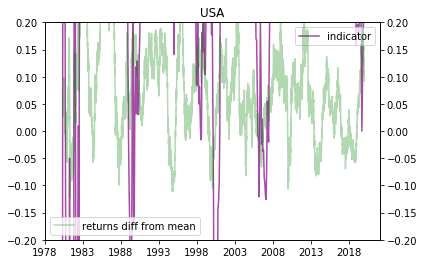

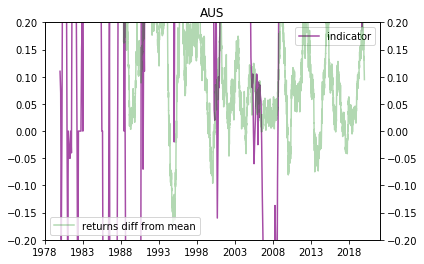

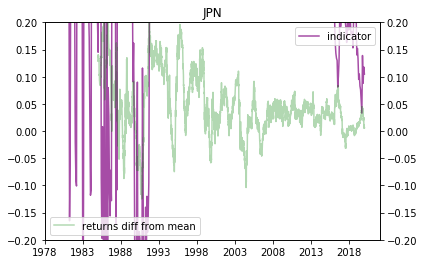

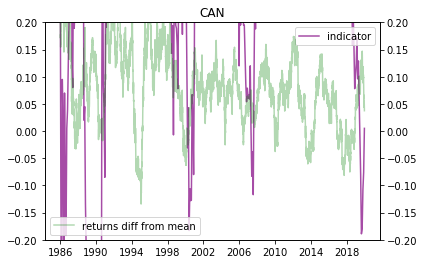

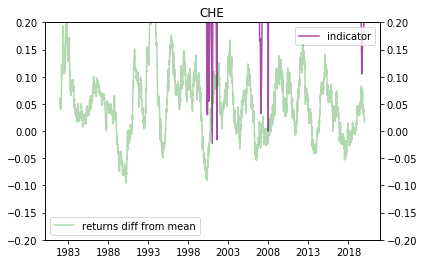

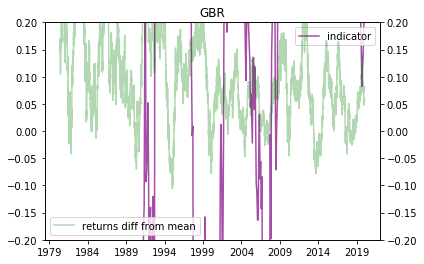

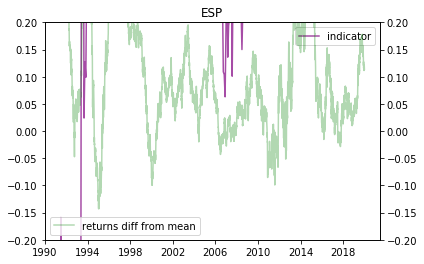

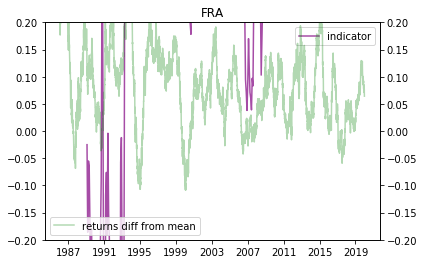

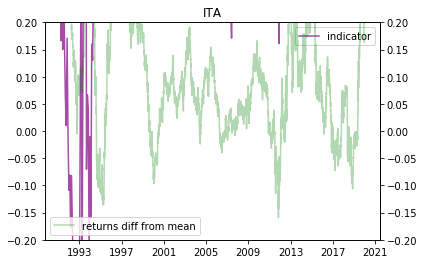

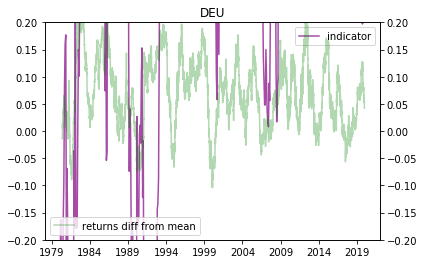

In [10]:
tfs = [tf]
uf.plot_vs_returns(countryList, bond_risk_premium, bond_one_year_rolling_returns, tfs)

['1980-01-01', '2020-01-01']


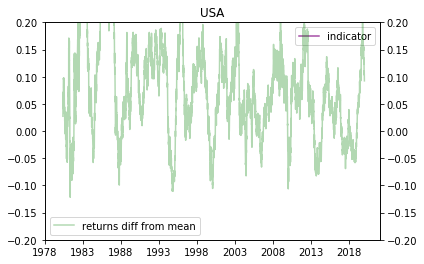

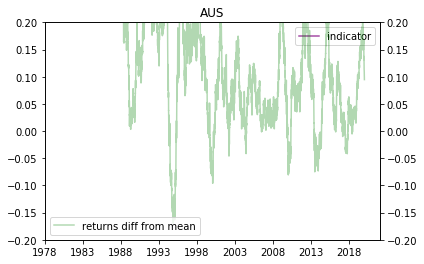

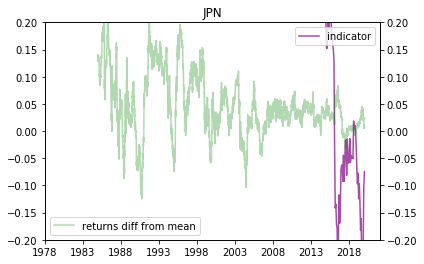

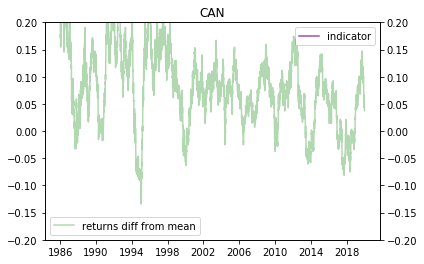

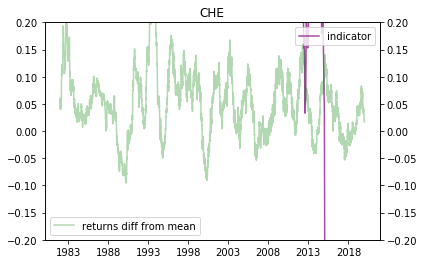

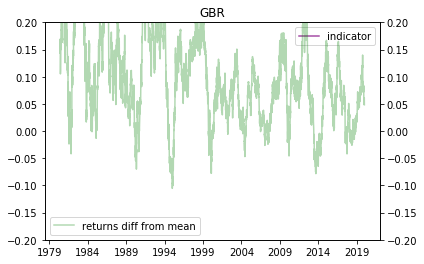

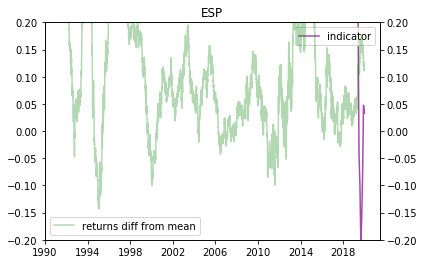

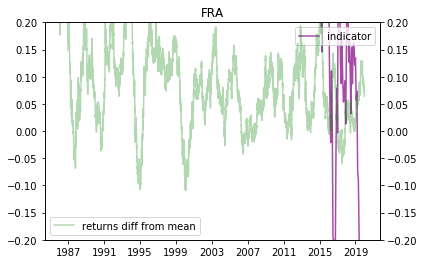

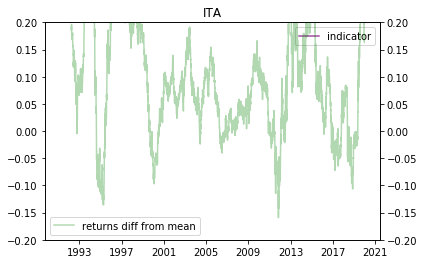

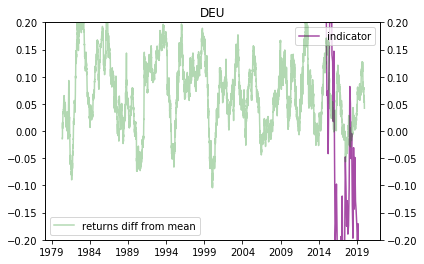

In [11]:
uf.plot_vs_returns(countryList, curve_height, bond_one_year_rolling_returns, tfs)

['1980-01-01', '2020-01-01']


NameError: name 'signal_centered' is not defined

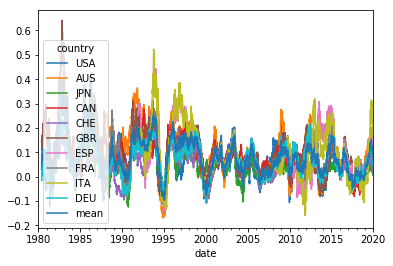

In [12]:
fshift = bond_one_year_rolling_returns.shift(-261)
for tf in tfs:
    print(tf)
    bond_one_year_rolling_returns.loc[tf[0]:tf[1],locs+['mean']].plot()
    signal_centered.loc[tf[0]:tf[1],:].plot()
    for country in locs:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        s = country + "signal"
        signal = signal_centered.loc[tf[0]:tf[1], s]
        ax1.plot(signal.to_timestamp(), color = 'purple', alpha=.7)
        returns_diff_from_global = fshift.loc[tf[0]:tf[1],country] - fshift.loc[tf[0]:tf[1],"mean"]
        ax2.plot(returns_diff_from_global.to_timestamp(), color = "green", alpha=.3)
        ax1.legend(["indicator"], loc = 'upper right')
        ax2.legend(["returns diff from mean"], loc="lower left")
        ax1.set(ylim=(-.2, .2))
        ax2.set(ylim=(-.2, .2))
        uf.align_yaxis(ax1, 0, ax2, 0)
        plt.title(country)
        plt.show()
        print(returns_diff_from_global.resample('M').last().corr(signal))

In [13]:
indicator_one_b_risk = bond_risk_premium

indicator_one_b_risk["mean"] = indicator_one_b_risk.mean(axis = 1)

for country in countryList:
    s = country + "diff"
    indicator_one_b_risk[s] = indicator_one_b_risk[country] - indicator_one_b_risk["mean"] 
    
#rolling average window size
n = 4
for country in countryList:
    s1 = country + "diff"
    s2 = country + "avg" + "diff"
    indicator_one_b_risk[s2] = indicator_one_b_risk[s1].shift(1).rolling(n * 12, min_periods = 12*n).mean()
    #indicator_one_b_risk[s2] = indicator_one_b_risk[s1].shift(1).rolling(n * 12, min_periods = 12*n).median()

for country in countryList:
    s0 = country + "norm"
    s1 = country + "avg" + "diff"
    indicator_one_b_risk[s0] = indicator_one_b_risk["mean"] + indicator_one_b_risk[s1]

'''for country in countryList:
    s0 = country + "signal" 
    s1 = country + "norm"
    indicator_one_b_risk[s0] = indicator_one_b_risk[country] - indicator_one_b_risk[s1]'''

for country in countryList:
    s0 = country + "signal"
    s1 = country + "norm"
    indicator_one_b_risk[s0] = .4 * (indicator_one_b_risk[country] - indicator_one_b_risk["mean"]) + .6 * (indicator_one_b_risk[country] - indicator_one_b_risk[s1])
    
print(indicator_one_b_risk.columns)    
indicator_one_b_signals = list(indicator_one_b_risk.columns)[-10:]
print(indicator_one_b_signals)
print(indicator_one_b_risk.loc[:, indicator_one_b_signals].max().max())
print(indicator_one_b_risk.loc[:, indicator_one_b_signals].min().min())

#indicator_one_b_risk.loc[:, ["USA", "mean", "USAdiff", "USAavgdiff", "USAnorm", "USAsignal"]] 
    

indicator_one_b_height = curve_height

'''/ (bond_risk_premium.max().max() - bond_risk_premium.min().min()) + \
                    curve_height / (curve_height.max().max() - curve_height.min().min())'''

indicator_one_b_height["mean"] = indicator_one_b_height.mean(axis = 1)

for country in countryList:
    s = country + "diff"
    indicator_one_b_height[s] = indicator_one_b_height[country] - indicator_one_b_height["mean"] 
    
#rolling average window size

for country in countryList:
    s1 = country + "diff"
    s2 = country + "avg" + "diff"
    indicator_one_b_height[s2] = indicator_one_b_height[s1].shift(1).rolling(n * 12, min_periods = 12*n).mean()
    #indicator_one_b_height[s2] = indicator_one_b_height[s1].shift(1).rolling(n * 12, min_periods = 12*n).median()
    
for country in countryList:
    s0 = country + "norm"
    s1 = country + "avg" + "diff"
    indicator_one_b_height[s0] = indicator_one_b_height["mean"] + indicator_one_b_height[s1]

'''for country in countryList:
    s0 = country + "signal" 
    s1 = country + "norm"
    indicator_one_b_height[s0] = indicator_one_b_height[country] - indicator_one_b_height[s1]'''

for country in countryList:
    s0 = country + "signal"
    s1 = country + "norm"
    indicator_one_b_height[s0] = .4 * (indicator_one_b_height[country] - indicator_one_b_height['mean']) + .6 * (indicator_one_b_height[country] - indicator_one_b_height[s1])


print(indicator_one_b_height.loc[:, indicator_one_b_signals].max().max())
print(indicator_one_b_height.loc[:, indicator_one_b_signals].min().min())

#scaling each component by its size or range - could consider other scaling methods like std

signal = indicator_one_b_risk.loc[:, indicator_one_b_signals] / (indicator_one_b_risk.loc[:, indicator_one_b_signals].max().max() - indicator_one_b_risk.loc[:, indicator_one_b_signals].min().min()) + \
        indicator_one_b_height.loc[:, indicator_one_b_signals] / (indicator_one_b_height.loc[:, indicator_one_b_signals].max().max() - indicator_one_b_height.loc[:, indicator_one_b_signals].min().min())

signal["mean"] = signal.mean(axis = 1)
signal_centered = signal.subtract(signal["mean"], axis = 0)
signal_centered

Index(['AUS', 'DEU', 'CAN', 'ESP', 'FRA', 'ITA', 'JPN', 'CHE', 'GBR', 'USA',
       'mean', 'USAdiff', 'AUSdiff', 'JPNdiff', 'CANdiff', 'CHEdiff',
       'GBRdiff', 'ESPdiff', 'FRAdiff', 'ITAdiff', 'DEUdiff', 'USAavgdiff',
       'AUSavgdiff', 'JPNavgdiff', 'CANavgdiff', 'CHEavgdiff', 'GBRavgdiff',
       'ESPavgdiff', 'FRAavgdiff', 'ITAavgdiff', 'DEUavgdiff', 'USAnorm',
       'AUSnorm', 'JPNnorm', 'CANnorm', 'CHEnorm', 'GBRnorm', 'ESPnorm',
       'FRAnorm', 'ITAnorm', 'DEUnorm', 'USAsignal', 'AUSsignal', 'JPNsignal',
       'CANsignal', 'CHEsignal', 'GBRsignal', 'ESPsignal', 'FRAsignal',
       'ITAsignal', 'DEUsignal'],
      dtype='object', name='country')
['USAsignal', 'AUSsignal', 'JPNsignal', 'CANsignal', 'CHEsignal', 'GBRsignal', 'ESPsignal', 'FRAsignal', 'ITAsignal', 'DEUsignal']
2.3644629017857146
-1.4820012499999997
4.324460312499999
-3.4877608705357135


country,USAsignal,AUSsignal,JPNsignal,CANsignal,CHEsignal,GBRsignal,ESPsignal,FRAsignal,ITAsignal,DEUsignal,mean
date,,,,,,,,,,,
1980-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = gi.generate_indicator_one(bond_risk_premium, curve_height)

In [ ]:
tf0 = ["1986-01-01", "1995-01-01"]
tf1 = ["1995-01-01", "2003-01-01"]
tf2 = ["2003-01-01", "2008-01-01"]
tf3 = ["2008-01-01", "2016-01-01"]
tf4 = ["2016-01-01", "2020-01-01"]
tfs = [tf0, tf1, tf2, tf3, tf4]

uf.plot_vs_returns(countryList, df, shifted_returns_diff_from_mean, tfs)

In [ ]:
#M2 Construction testing
#idea - change in m2 can be approximated with average change in m1 and m3

m1_money_supply = dsPuller.ds_country_pull(lambda x: f'{x}CMS1..B', start_date, '', 'M')
m2_money_supply = dsPuller.ds_country_pull(lambda x: f'{x}CMS2..B', start_date, '', 'M',list(filter(lambda x: x !='AUS', countryList)))
m3_money_supply = dsPuller.ds_country_pull(lambda x: f'{x}CMS3..B', start_date, '', 'M',list(filter(lambda x: x !='USA', countryList)))


In [ ]:
m2_proxy = .5 * m1_money_supply + .5 * m3_money_supply

In [ ]:
m2_proxy["USA"] = m2_money_supply["USA"]

In [ ]:
#using idea from paper - rolling three month divided by past year
indicator_two_attempt_one = change_in_money_supply = m2_proxy.rolling(3).mean() / m2_proxy.rolling(12).mean()

In [ ]:
indicator_two_attempt_one = indicator_two_attempt_one - 1

In [ ]:
#Indicator 2 testing 0
#Now see if this indicator is worth anything at all - want to investigate change in money supply vs returns and yields

locs = countryList
indicator_two_attempt_one.loc[:,locs].plot()
tf0 = ["1986-01-01", "1995-01-01"]
tf1 = ["1995-01-01", "2003-01-01"]
tf2 = ["2003-01-01", "2008-01-01"]
tf3 = ["2008-01-01", "2016-01-01"]
tf4 = ["2016-01-01", "2020-01-01"]
tfs = [tf0, tf1, tf2, tf3, tf4]

for tf in tfs:
    print(tf)
    bond_one_year_rolling_returns.loc[tf[0]:tf[1],locs+['mean']].plot()
    indicator_two_attempt_one.loc[tf[0]:tf[1],locs+['mean']].plot()
    for country in locs:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(indicator_two_attempt_one.loc[tf[0]:tf[1],country].to_timestamp())
        ax2.plot(bond_one_year_rolling_returns.loc[tf[0]:tf[1],country].shift(-261).to_timestamp(), color = "orange")
        plt.title(country)
        ax1.set(ylim=(-.2, .2))
        ax2.set(ylim=(-.2, .2))
        uf.align_yaxis(ax1, 0, ax2, 0)
        plt.show()

In [ ]:
#idea 3)
#use currency appreciation (twi) to predict bond returns.
fxVsUSD = dsPuller.ds_country_pull(lambda x: f'{x}XRUSD.', start_date, '', 'M')
fxRealPrices_TrdWts = dsPuller.ds_country_pull(lambda x: f'{x}CXTR..F', start_date, '', 'M',['USA', 'AUS', 'JPN', 'CHE', 'GBR'])

In [ ]:
relative_value = fxVsUSD
relative_value["GBR"] = 1 / fxVsUSD["GBR"]
relative_value
change_in_fx = relative_value.rolling(3).mean() / relative_value.shift(3).rolling(12).mean() - 1
change_in_fx

In [ ]:
#fx isn't perfectly in line with twi so need to proxy
for country in ['USA', 'AUS', 'JPN', 'CHE', 'GBR']:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(change_in_fx.to_timestamp(), color = 'purple', alpha=.7)
    ax2.plot(change_in_twi.to_timestamp(), color = "green", alpha=.3)
    ax1.legend(["change in US exchange"], loc = 'upper right')
    ax2.legend(["change in twi"], loc="lower left")
    ax1.set(ylim=(-.2, .2))
    ax2.set(ylim=(-.2, .2))
    uf.align_yaxis(ax1, 0, ax2, 0)
    plt.title(country)
    plt.show()
    print(change_in_fx[country].corr(change_in_twi[country]))


In [ ]:
change_in_twi = fxRealPrices_TrdWts.rolling(3).mean() / fxRealPrices_TrdWts.shift(3).rolling(12).mean() - 1

In [14]:
signal_centered

country,USAsignal,AUSsignal,JPNsignal,CANsignal,CHEsignal,GBRsignal,ESPsignal,FRAsignal,ITAsignal,DEUsignal,mean
date,,,,,,,,,,,
1980-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
GBR_twi_proxy_pt1 = (1 / fxVsUSD["GBR"] * fxVsUSD["CHE"] * fxRealPrices_TrdWts["CHE"])
change_in_proxy_GBR = GBR_twi_proxy_pt1.rolling(3).mean() / GBR_twi_proxy_pt1.shift(3).rolling(12).mean() - 1
change_in_proxy_GBR
GBR_twi_proxy_pt2 = (1 / fxVsUSD["GBR"] * fxVsUSD["CHE"])
change_in_proxy_GBR_adj = GBR_twi_proxy_pt2.rolling(3).mean() / GBR_twi_proxy_pt2.shift(3).rolling(12).mean() - 1
change_in_proxy_GBR_better = .97 * change_in_proxy_GBR - .03 * change_in_proxy_GBR_adj

print(change_in_proxy_GBR_better.corr(change_in_twi["GBR"]))


In [ ]:
CHE_twi_proxy_pt1 = (1 / fxVsUSD["CHE"] * fxVsUSD["GBR"] * fxRealPrices_TrdWts["GBR"])
change_in_proxy_CHE = CHE_twi_proxy_pt1.rolling(3).mean() / CHE_twi_proxy_pt1.shift(3).rolling(12).mean() - 1
CHE_twi_proxy_pt2 = (1 / fxVsUSD["CHE"] * fxVsUSD["GBR"])
change_in_proxy_CHE_adj = CHE_twi_proxy_pt2.rolling(3).mean() / CHE_twi_proxy_pt2.shift(3).rolling(12).mean() - 1
change_in_proxy_CHE_better = .9 * change_in_proxy_CHE + .1 * change_in_proxy_CHE_adj

print(change_in_proxy_CHE_better.corr(change_in_twi["CHE"]))

In [ ]:
twi_proxy = fxRealPrices_TrdWts
#Canada most similar to US by top 15 trading partners but has US making up 75% of exports 
#Euro countries (Italy, Spain, France, Germany) most similar to Switzerland construction
#Idea - can proxy change in twi by converting local currency to USD or CHE and tracking change in those twi's
#assumption - "similar" countries trade with the same partners in relatively similar proportions 
#in actuality, need to subtract off a bit accounting for countries trading with themselves and add on effect of bilateral exchange rate

twi_proxy["ITA"] = (1 / fxVsUSD["ITA"] * fxVsUSD["CHE"] * fxRealPrices_TrdWts["CHE"])
twi_proxy["FRA"] = (1 / fxVsUSD["FRA"] * fxVsUSD["CHE"] * fxRealPrices_TrdWts["CHE"])
twi_proxy["DEU"] = (1 / fxVsUSD["DEU"] * fxVsUSD["CHE"] * fxRealPrices_TrdWts["CHE"])
twi_proxy["ESP"] = (1 / fxVsUSD["ESP"] * fxVsUSD["CHE"] * fxRealPrices_TrdWts["CHE"])
twi_proxy["CAN"] = (1 / fxVsUSD["CAN"] * fxRealPrices_TrdWts["USA"])
change_in_twi_proxy = twi_proxy.rolling(3).mean() / twi_proxy.shift(3).rolling(12).mean() - 1
change_in_twi_proxy 


In [ ]:
USA_to_fx = 1 / fxVsUSD

change_in_USA_to_fx = USA_to_fx.rolling(3).mean() / USA_to_fx.shift(3).rolling(12).mean() - 1
CHE_to_fx = (1 / fxVsUSD).mul(fxVsUSD["CHE"], axis=0)
change_in_CHE_to_fx = CHE_to_fx.rolling(3).mean() / CHE_to_fx.shift(3).rolling(12).mean() - 1

#GBR_twi_proxy_pt2 = (1 / fxVsUSD["GBR"] * fxVsUSD["CHE"])
#change_in_proxy_GBR_adj = GBR_twi_proxy_pt2.rolling(3).mean() / GBR_twi_proxy_pt2.shift(3).rolling(12).mean() - 1

change_in_CHE_to_fx


In [ ]:
weights = [.05, .03, .04, .015, .75]
proxied = list(change_in_twi_proxy.columns[-5:])
print(proxied)
for ix, country in enumerate(proxied):
    if country == "CAN":
        change_in_twi_proxy[country] = change_in_twi_proxy[country] * (1 - weights[ix]) + change_in_USA_to_fx[country] * weights[ix]
    else:
        change_in_twi_proxy[country] = change_in_twi_proxy[country] * (1 - weights[ix]) + change_in_CHE_to_fx[country] * weights[ix]

In [ ]:
print(change_in_twi_proxy["FRA"].corr(change_in_fx["FRA"]))

In [ ]:
locs = countryList
indicator_two_attempt_one.loc[:,locs].plot()
tf0 = ["1986-01-01", "1995-01-01"]
tf1 = ["1995-01-01", "2003-01-01"]
tf2 = ["2003-01-01", "2008-01-01"]
tf3 = ["2008-01-01", "2016-01-01"]
tf4 = ["2016-01-01", "2020-01-01"]
tfs = [tf0, tf1, tf2, tf3, tf4]

for tf in tfs:
    print(tf)
    bond_one_year_rolling_returns.loc[tf[0]:tf[1],locs+['mean']].plot()
    change_in_twi.loc[tf[0]:tf[1],locs].plot()
    for country in locs:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(change_in_twi_proxy.loc[tf[0]:tf[1],country].to_timestamp())
        ax2.plot(bond_one_year_rolling_returns.loc[tf[0]:tf[1],country].shift(-130).to_timestamp(), color = "orange")
        plt.title(country)
        ax1.set(ylim=(-.2, .2))
        ax2.set(ylim=(-.2, .2))
        uf.align_yaxis(ax1, 0, ax2, 0)
        plt.show()

In [ ]:
for country in locs:
    s0 = country + "mean" 
    change_in_twi_proxy[s0] = change_in_twi_proxy.loc[:, country].expanding().mean()
    
for country in locs:
    s0 = country + "mean" 
    s1 = country + "diff_from_mean"
    change_in_twi_proxy[s1] = change_in_twi_proxy[country] - change_in_twi_proxy[s0]

    indicator_three_b = list(change_in_twi_proxy.columns)[-10:]
    indicator_three_b = change_in_twi_proxy.loc[:, indicator_three_b]
indicator_three_b


indicator_three_b["mean"] = indicator_three_b.mean(axis = 1)
indicator_three_b_centered = indicator_three_b.subtract(indicator_three_b["mean"], axis = 0)
indicator_three_b_centered

In [ ]:
#final?
fshift = bond_one_year_rolling_returns.shift(-261)
for tf in tfs:
    print(tf)
    bond_one_year_rolling_returns.loc[tf[0]:tf[1],locs+['mean']].plot()
    indicator_three_b_centered.loc[tf[0]:tf[1],:].plot()
    for country in locs:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        s = country + "diff_from_mean"
        signal = indicator_three_b_centered.loc[tf[0]:tf[1], s]
        ax1.plot(signal.to_timestamp(), color = 'purple', alpha=.7)
        returns_diff_from_global = fshift.loc[tf[0]:tf[1],country] - fshift.loc[tf[0]:tf[1],"mean"]
        ax2.plot(returns_diff_from_global.to_timestamp(), color = "green", alpha=.3)
        ax1.legend(["indicator"], loc = 'upper right')
        ax2.legend(["returns diff from mean"], loc="lower left")
        ax1.set(ylim=(-.2, .2))
        ax2.set(ylim=(-.2, .2))
        align_yaxis(ax1, 0, ax2, 0)
        plt.title(country)
        plt.show()
        print(returns_diff_from_global.resample('M').last().corr(signal))

In [ ]:
#plotting both signals
#final?
fshift = bond_one_year_rolling_returns.shift(-261)
for tf in tfs:
    print(tf)
    bond_one_year_rolling_returns.loc[tf[0]:tf[1],locs+['mean']].plot()
    indicator_three_b_centered.loc[tf[0]:tf[1],:].plot()
    for country in locs:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        s = country + "signal"
        signal = signal_centered.loc[tf[0]:tf[1], s]
        ax1.plot(signal.to_timestamp(), color = 'blue', alpha=.7)
        s = country + "diff_from_mean"
        signal2 = indicator_three_b_centered.loc[tf[0]:tf[1], s]
        ax1.plot(signal2.to_timestamp(), color = 'purple', alpha=.7)
        returns_diff_from_global = fshift.loc[tf[0]:tf[1],country] - fshift.loc[tf[0]:tf[1],"mean"]
        combined = signal + signal2
        avg = combined /2
        ax1.plot(combined.to_timestamp(), color = 'orange', alpha=.7)
        ax1.plot(avg.to_timestamp(), color = 'black', alpha=1)
        ax2.plot(returns_diff_from_global.to_timestamp(), color = "green", alpha=.9)
        ax1.legend(["indicator"], loc = 'upper right')
        ax2.legend(["returns diff from mean"], loc="lower left")
        ax1.set(ylim=(-.2, .2))
        ax2.set(ylim=(-.2, .2))
        align_yaxis(ax1, 0, ax2, 0)
        plt.title(country)
        plt.show()
        #print(returns_diff_from_global.resample('M').last().corr(signal))

In [16]:
signal_one = signal_centered
signal_one_quarterly = signal_one.resample("Q").last()
quarterly_bond_index = bondReturnIdx_locFX.resample("Q").last()
signal_one_quarterly = signal_one_quarterly.iloc[:, :-1]
signal_one_quarterly.columns = countryList
signal_one_quarterly

,USA,AUS,JPN,CAN,CHE,GBR,ESP,FRA,ITA,DEU
date,,,,,,,,,,
1980Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
quarterly_bonds_shifted = quarterly_bond_index.shift(-1)
quarterly_returns_shifted = quarterly_bonds_shifted.pct_change(1)
quarterly_returns_shifted = quarterly_returns_shifted[countryList]
quarterly_returns_shifted

country,USA,AUS,JPN,CAN,CHE,GBR,ESP,FRA,ITA,DEU
date,,,,,,,,,,
1980Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980Q2,-0.075866,NaN,NaN,NaN,NaN,0.067403,NaN,NaN,NaN,-0.008635
1980Q3,0.012858,NaN,NaN,NaN,NaN,-0.029703,NaN,NaN,NaN,-0.020263
1980Q4,-0.006150,NaN,NaN,NaN,-0.002963,0.093187,NaN,NaN,NaN,-0.030641
1981Q1,0.001222,NaN,NaN,NaN,-0.015332,-0.056829,NaN,NaN,NaN,0.004679
1981Q2,-0.058114,NaN,NaN,NaN,-0.012505,-0.010250,NaN,NaN,NaN,0.008321
1981Q3,0.126637,NaN,NaN,NaN,0.091003,0.077780,NaN,NaN,NaN,0.071766
1981Q4,0.027669,NaN,NaN,NaN,0.048962,0.196641,NaN,NaN,NaN,0.048745
1982Q1,0.015080,NaN,NaN,NaN,0.026313,0.060503,NaN,NaN,NaN,0.014866


In [19]:
p_and_l_one = signal_one_quarterly * quarterly_returns_shifted * 2
p_and_l_one

,USA,AUS,JPN,CAN,CHE,GBR,ESP,FRA,ITA,DEU
date,,,,,,,,,,
1980Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
p_and_l_one["total"] = p_and_l_one.sum(axis=1)

In [ ]:
ev_one = p_and_l_one['total'][16:].mean() * 4
std_one = p_and_l_one['total'][16:].std() * 2
print(ev_one, std_one)

In [ ]:
corr_returns_one = p_and_l_one['total'].corr(quarterly_returns_shifted.mean(axis=1))
print(corr_returns_one)

In [ ]:
signal_three = indicator_three_b_centered
signal_three_quarterly = signal_three.resample("Q").last()
signal_three_order = list(signal_three_quarterly.columns)
signal_three_order_clean = list(map(lambda x: x.replace("diff_from_mean",""), signal_three_order))
signal_three_quarterly.columns = signal_three_order_clean
signal_three_quarterly = signal_three_quarterly.iloc[:, :-1]

In [ ]:
p_and_l_three = signal_three_quarterly * quarterly_returns_shifted
p_and_l_three
for country in countryList:
    print(country)
    p_and_l_three[country].plot()
    plt.show()

In [ ]:
p_and_l_three["total"] = p_and_l_three.sum(axis=1)

In [ ]:
ev_three = p_and_l_three['total'][17:].mean() * 4
std_three = p_and_l_three['total'][17:].std() * 2
print(ev_three, std_three)

In [ ]:
for country in countryList:
    a = p_and_l_three[country][4:].mean() * 4
    b = p_and_l_three[country][4:].std() * 2
    print(a, b, country)

In [ ]:
corr_returns_three = p_and_l_three['total'].corr(quarterly_returns_shifted.mean(axis=1))
print(corr_returns_three)

In [ ]:
cross_corr = p_and_l_three['total'].corr(p_and_l_one['total'])
print(cross_corr)

In [ ]:
total_signal =  signal_one_quarterly + 3 * signal_three_quarterly 
p_and_l_total = total_signal * quarterly_returns_shifted
p_and_l_total
for country in countryList:
    print(country)
    p_and_l_total[country].plot()
    plt.show()

In [ ]:
p_and_l_total["total"] = p_and_l_total.sum(axis=1)

In [ ]:
ev_total = p_and_l_total['total'][17:].mean() * 4
std_total = p_and_l_total['total'][17:].std() * 2
print(ev_total, std_total)

In [ ]:
p_and_l_total['total'].plot()
plt.show()

In [ ]:
demo = p_and_l_total['total'] + 1
demo.cumprod().plot()
plt.show()

In [ ]:
p_and_l_total['total'].corr(quarterly_returns_shifted.mean(axis=1))